<a href="https://colab.research.google.com/github/Mumo-vicky/Match-Result-Prediction/blob/master/Match_Result_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Match Result Prediction**

## **Defining Question**

I have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.
A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## **Defining Metric For Success**

I am suppossed to find a suitable model that will have the highest accuracy for the prediction of the matches.

## **Understanding The Context**

There are national teams and the matches that they have played and their rankings over the years. Finding out a way to predict the outcome based on the various factors is what I want to achieve and I thus have to find a suitable model for that.

## **Data Relevance**

The data provided are two csv files namely:
*   fifa_ranking.csv
*   results.csv

They contain various columns with extensive data.
The fifa ranking started in the year 2006 and thus the data after this year from table is more precise.
However, on looking at the data, I noticed that most values remained zero for most part of the data up until 8/24/2011.
I thus decided that I would use the data from this date onwards so as to attain more accuracy with regards to the ranks.
I am suppossed to clean the datasets, join them sets so as to get information for the matches all in one dataset and perform various types of regressions.

**Loading The Data.**

In [4]:
#importing the appropriate libraries
import pandas as pd
import numpy as np

In [5]:
#loading our dataset to our environment
ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

**Exploration of The Data**

In [ ]:
#displaying the rows and columns in our datasets.
print('Ranking rows and columns: ', ranking.shape)
print('Results rows and columns: ', results.shape)

In [ ]:
#previewing the top of our dataset
ranking.head()

In [ ]:
#previewing the top of our dataset
results.head()

In [ ]:
#previewing the bottom of our dataset
ranking.tail()

In [ ]:
#previewing the bottom of our dataset
results.tail()

In [ ]:
#describing of our dataset.
ranking.describe()

In [ ]:
#describing of our dataset.
results.describe()

In [ ]:
#checking for null values.
ranking.isnull().sum()

In [ ]:
#checking for null values
results.isnull().sum()

In [ ]:
#checkig for missing values
ranking.isna().sum()

In [ ]:
#checkig for missing values
results.isna().sum()

In [ ]:
#viewing information about our dataset.
results.info()

In [ ]:
#changing the date to datetime type and adding columns for the years, months and days for merging.
results['date_parsed'] = pd.to_datetime(results['date'], format = "%Y-%m-%d")
results = results.drop(columns='date')
results['year'] = results['date_parsed'].dt.year
results['month'] = results['date_parsed'].dt.month
results['day'] = results['date_parsed'].dt.day
results.head()

In [ ]:
#selecting data from the specified dates since that is when fifa ranking started and the data collected within the time is better.
date1 = '2011-08-24'
within = (results['date_parsed'] >= date1)
results1 = results.loc[within].reset_index()
results1 = results1.drop(columns='index')
results1.head()

In [20]:
#checking the rows and columns of the new dataset
results1.shape

(7560, 12)

In [ ]:
#changing the date to datetime type and adding columns for the years, months and days for merging.
ranking['date_parsed'] = pd.to_datetime(ranking['rank_date'], format = "%Y-%m-%d")
ranking = ranking.drop(columns='rank_date')
ranking['year'] = ranking['date_parsed'].dt.year
ranking['month'] = ranking['date_parsed'].dt.month
ranking['day'] = ranking['date_parsed'].dt.day
ranking.head()

In [ ]:
#selecting data from the specified dates since that is when fifa ranking started and the data collected within the time is better.
within = (ranking['date_parsed'] >= date1)
ranking1 = ranking.loc[within].reset_index()
ranking1 = ranking1.drop(columns='index')
ranking1.head()

In [ ]:
#checking the rows and columns
#there is a significant reduction proving that most of the data wouldn't fit our analysis and prediction.
ranking1.shape

In [30]:
#creating a dataset for home teams by merging the two datasets conveniently
home_data=pd.merge(ranking1,results1, left_on=['country_full','year', 'month'], right_on=['home_team','year','month'],how='inner')
home_data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_parsed_x,year,month,day_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_parsed_y,day_y
0,92,Jordan,JOR,348.42,364,-1,215.10,215.10,171.87,85.94,55.46,16.64,153.72,30.74,AFC,2011-08-24,2011,8,24,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011-08-27,27
1,96,Angola,ANG,338.07,330,4,166.89,166.89,170.24,85.12,106.93,32.08,269.88,53.98,CAF,2011-08-24,2011,8,24,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False,2011-08-27,27
2,101,Bahrain,BHR,325.01,331,-3,88.45,88.45,196.12,98.06,264.59,79.38,295.59,59.12,AFC,2011-08-24,2011,8,24,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011-08-26,26
3,103,Oman,OMA,311.64,308,3,138.89,138.89,130.90,65.45,239.68,71.90,177.02,35.40,AFC,2011-08-24,2011,8,24,Oman,Kuwait,1,0,Friendly,Muscat,Oman,False,2011-08-27,27
4,106,Antigua and Barbuda,ATG,307.77,308,0,219.95,219.95,0.00,0.00,217.18,65.15,113.33,22.67,CONCACAF,2011-08-24,2011,8,24,Antigua and Barbuda,Saint Vincent and the Grenadines,2,2,Friendly,Osbourn,Antigua and Barbuda,False,2011-08-28,28


In [31]:
#checking for the rows and columns
home_data.shape

(5815, 29)

In [ ]:
#creating a dataset for the away teams by conveniently merging the two datasets conveniently
away_data=pd.merge(ranking1,results1, left_on=['country_full','year', 'month'], right_on=['away_team','year','month'],how='inner')
away_data.head()

In [15]:
#checking for the rows and columns.
away_data.shape

(5750, 29)

In [ ]:
#dropping the columns that we don't need for merging since they will be duplicated on merging if not removed.
new_away = away_data.drop(columns = ['country_full', 'country_abrv', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted','two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation', 'date_parsed_x', 'day_x', 'home_team', 'home_score', 'away_score','tournament', 'city', 'country', 'neutral', 'date_parsed_y', 'day_y'])
new_away.head()

In [39]:
#creating our comprehensive dataset for use with all the information we need by merging our home team dataset and our new away team dataset.
data = pd.merge(home_data,new_away, left_on=['away_team','year','month'],right_on=['away_team','year','month'],how='inner')
data.head()

,rank_x,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_parsed_x,year,month,day_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_parsed_y,day_y,rank_y
0,92,Jordan,JOR,348.42,364,-1,215.10,215.10,171.87,85.94,55.46,16.64,153.72,30.74,AFC,2011-08-24,2011,8,24,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011-08-27,27,131
1,101,Bahrain,BHR,325.01,331,-3,88.45,88.45,196.12,98.06,264.59,79.38,295.59,59.12,AFC,2011-08-24,2011,8,24,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011-08-26,26,98
2,103,Oman,OMA,311.64,308,3,138.89,138.89,130.90,65.45,239.68,71.90,177.02,35.40,AFC,2011-08-24,2011,8,24,Oman,Kuwait,1,0,Friendly,Muscat,Oman,False,2011-08-27,27,95
3,108,United Arab Emirates,UAE,298.87,301,1,132.31,132.31,230.12,115.06,66.82,20.05,157.27,31.45,AFC,2011-08-24,2011,8,24,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011-08-25,25,88
4,114,Guyana,GUY,260.28,269,0,183.89,183.89,68.85,34.43,60.92,18.28,118.41,23.68,CONCACAF,2011-08-24,2011,8,24,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,24,158


In [40]:
#checking for the rows and columns
data.shape

(8549, 30)

In [41]:
#organising the dataset columns and removing the repeated ones.
data.rename({'rank_x' : 'home_team_rank','rank_y' : 'away_team_rank', 'date_parsed_y' : 'date'}, axis = 1, inplace = True)
data = data.sort_values(by='date').reset_index()
data = data.drop(columns=['date_parsed_x','day_x','day_y','month','index'])
data.head()

,home_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,away_team_rank
0,114,Guyana,GUY,260.28,269,0,183.89,183.89,68.85,34.43,60.92,18.28,118.41,23.68,CONCACAF,2011,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,158
1,120,Thailand,THA,245.77,252,-2,111.99,111.99,123.07,61.53,129.94,38.98,166.33,33.27,AFC,2011,Thailand,Singapore,0,0,Friendly,Bangkok,Thailand,False,2011-08-24,129
2,108,United Arab Emirates,UAE,298.87,301,1,132.31,132.31,230.12,115.06,66.82,20.05,157.27,31.45,AFC,2011,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011-08-25,88
3,101,Bahrain,BHR,325.01,331,-3,88.45,88.45,196.12,98.06,264.59,79.38,295.59,59.12,AFC,2011,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011-08-26,98
4,92,Jordan,JOR,348.42,364,-1,215.10,215.10,171.87,85.94,55.46,16.64,153.72,30.74,AFC,2011,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011-08-27,131


In [42]:
#checking for duplicated instances in the dataset.
data.duplicated().sum()

3280

In [43]:
#dropping the duplicates.
data.drop_duplicates(keep=False,inplace=True)

In [44]:
#confirming the deletion of the duplicates.
data.duplicated().sum()

0

In [45]:
data.shape

(3016, 26)

In [46]:
#importing libraries for plotting.
import matplotlib.pyplot as plt

In [47]:
#asigning the rows to different lists for plotting in order to check for outliers.
data_1 = data['home_team_rank']
data_2 = data['away_team_rank']
data_3 = data['previous_points']
data_4 = data['rank_change']
data_5 = data['home_score']
data_6 = data['away_score']
data_7 = data['total_points']
data_8 = data['cur_year_avg']
data_9 = data['cur_year_avg_weighted']
data_10 = data['last_year_avg']
data_11 = data['last_year_avg_weighted']
data_12 = data['two_year_ago_avg']
data_13 = data['two_year_ago_weighted']
data_14 = data['three_year_ago_avg']
data_15 = data['three_year_ago_weighted']

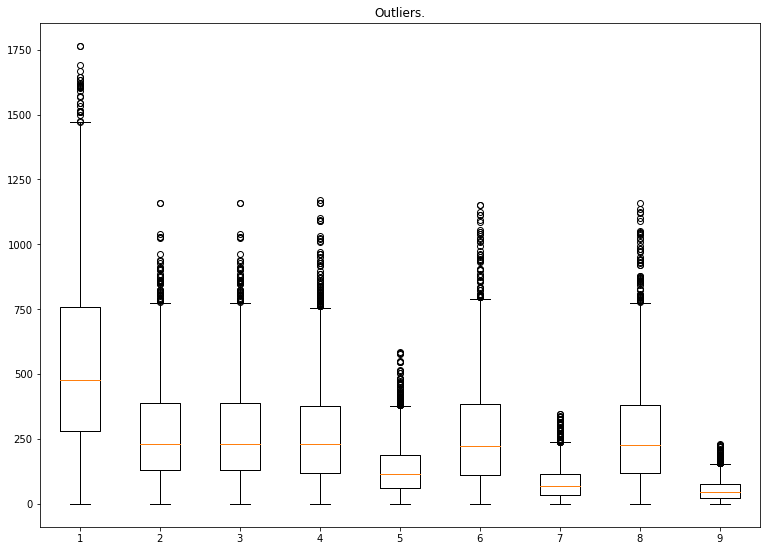

In [48]:
#declaring the lists(rows) to plot to see outliers.
plots1 = [data_7, data_8, data_9, data_10, data_11, data_12, data_13, data_14, data_15] 
#plotting the boxplots.
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0,0,1,1]) 
bp = ax.boxplot(plots1)
plt.title('Outliers.')
plt.show() 

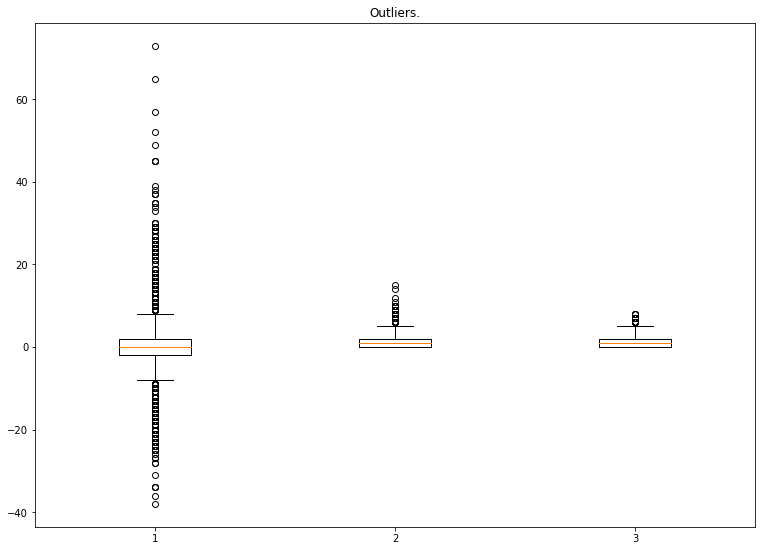

In [49]:
#declaring the lists(rows) to plot to see outliers.
plots2 = [data_4, data_5, data_6] 
#plotting the boxplots.
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0,0,1,1]) 
bp = ax.boxplot(plots2)
plt.title('Outliers.')
plt.show() 

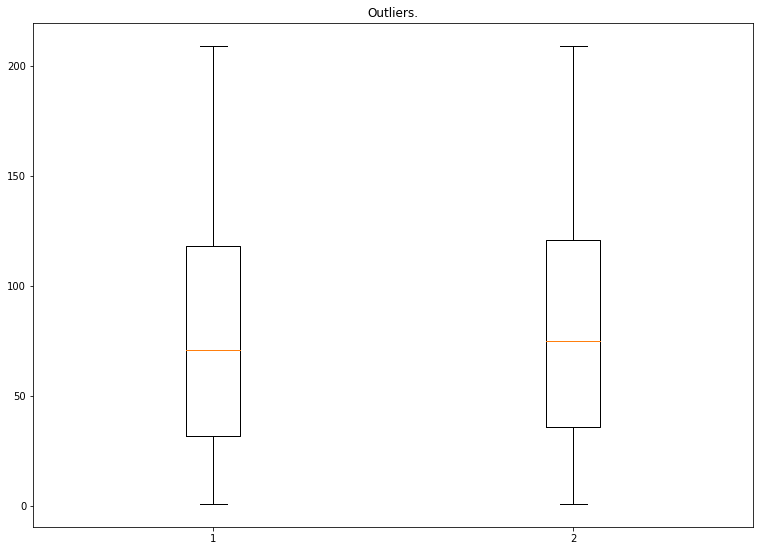

In [50]:
#declaring the lists(rows) to plot to see outliers.
plots3 = [data_1, data_2] 
#plotting the boxplots.
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0,0,1,1]) 
bp = ax.boxplot(plots3)
plt.title('Outliers.')
plt.show() 

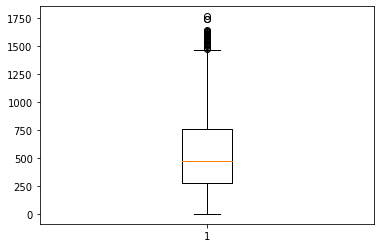

In [51]:
#declaring the lists(rows) to plot to see outliers.
#plotting the boxplot
plt.boxplot(data_3)
plt.title('')
plt.show()

In [53]:
#creating conditions for the tournaments and assigning the results to a new column
friendly = (data["tournament"] == "Friendly")
worldcup = (data["tournament"] == 'FIFA World Cup qualification') | (data['tournament'] == 'FIFA World Cup')
other = (data["tournament"] != "Friendly") & (data["tournament"] != "FIFA World Cup qualification") & (data["tournament"] != "FIFA World Cup")
conditions = [friendly, worldcup, other]
choices = ["Friendly", "WorldCup", "Other"]
data["tournament_1"] = np.select(conditions,choices)
data.head()

,home_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,away_team_rank,tournament_1
0,114,Guyana,GUY,260.28,269,0,183.89,183.89,68.85,34.43,60.92,18.28,118.41,23.68,CONCACAF,2011,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,158,Friendly
1,120,Thailand,THA,245.77,252,-2,111.99,111.99,123.07,61.53,129.94,38.98,166.33,33.27,AFC,2011,Thailand,Singapore,0,0,Friendly,Bangkok,Thailand,False,2011-08-24,129,Friendly
2,108,United Arab Emirates,UAE,298.87,301,1,132.31,132.31,230.12,115.06,66.82,20.05,157.27,31.45,AFC,2011,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011-08-25,88,Friendly
3,101,Bahrain,BHR,325.01,331,-3,88.45,88.45,196.12,98.06,264.59,79.38,295.59,59.12,AFC,2011,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011-08-26,98,Friendly
4,92,Jordan,JOR,348.42,364,-1,215.10,215.10,171.87,85.94,55.46,16.64,153.72,30.74,AFC,2011,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011-08-27,131,Friendly


In [55]:
#creating conditions for the match results and assigning the results to a new column
win = (data["home_score"] > data["away_score"])
loss = (data["home_score"] < data["away_score"])
draw = (data["home_score"] == data["away_score"])
conditions = [win, loss, draw]
choices = ["Win", "Loss", "Draw"]
data["result"] = np.select(conditions,choices,default="")
data.head()

,home_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,away_team_rank,tournament_1,result
0,114,Guyana,GUY,260.28,269,0,183.89,183.89,68.85,34.43,60.92,18.28,118.41,23.68,CONCACAF,2011,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,158,Friendly,Win
1,120,Thailand,THA,245.77,252,-2,111.99,111.99,123.07,61.53,129.94,38.98,166.33,33.27,AFC,2011,Thailand,Singapore,0,0,Friendly,Bangkok,Thailand,False,2011-08-24,129,Friendly,Draw
2,108,United Arab Emirates,UAE,298.87,301,1,132.31,132.31,230.12,115.06,66.82,20.05,157.27,31.45,AFC,2011,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011-08-25,88,Friendly,Win
3,101,Bahrain,BHR,325.01,331,-3,88.45,88.45,196.12,98.06,264.59,79.38,295.59,59.12,AFC,2011,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011-08-26,98,Friendly,Win
4,92,Jordan,JOR,348.42,364,-1,215.10,215.10,171.87,85.94,55.46,16.64,153.72,30.74,AFC,2011,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011-08-27,131,Friendly,Win


In [56]:
#creating a new column for the total scores in a match
data['total_scores'] = data['home_score'] + data['away_score']
data.head()

,home_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,away_team_rank,tournament_1,result,total_scores
0,114,Guyana,GUY,260.28,269,0,183.89,183.89,68.85,34.43,60.92,18.28,118.41,23.68,CONCACAF,2011,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,158,Friendly,Win,3
1,120,Thailand,THA,245.77,252,-2,111.99,111.99,123.07,61.53,129.94,38.98,166.33,33.27,AFC,2011,Thailand,Singapore,0,0,Friendly,Bangkok,Thailand,False,2011-08-24,129,Friendly,Draw,0
2,108,United Arab Emirates,UAE,298.87,301,1,132.31,132.31,230.12,115.06,66.82,20.05,157.27,31.45,AFC,2011,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011-08-25,88,Friendly,Win,4
3,101,Bahrain,BHR,325.01,331,-3,88.45,88.45,196.12,98.06,264.59,79.38,295.59,59.12,AFC,2011,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011-08-26,98,Friendly,Win,1
4,92,Jordan,JOR,348.42,364,-1,215.10,215.10,171.87,85.94,55.46,16.64,153.72,30.74,AFC,2011,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011-08-27,131,Friendly,Win,1


<function matplotlib.pyplot.show>

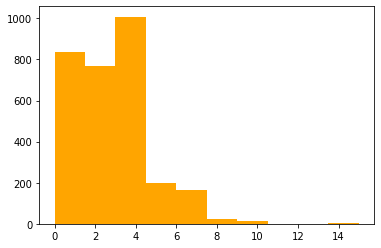

In [58]:
#plotting a histogram for the total scores
plt.hist(data['total_scores'],color='orange')

plt.show

Most matches have a total score of between 3 and 4 goals

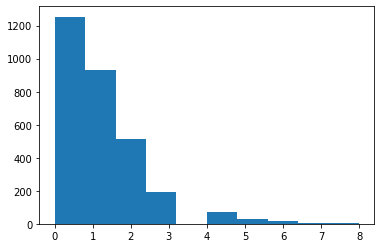

In [59]:
#plotting a histogram for the away scores
plt.hist(data['away_score'])
plt.show()

Most teams either score 0 or 1.

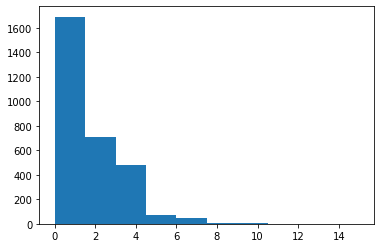

In [60]:
plt.hist(data['home_score'])
plt.show()

Most home teams score 0 or 1

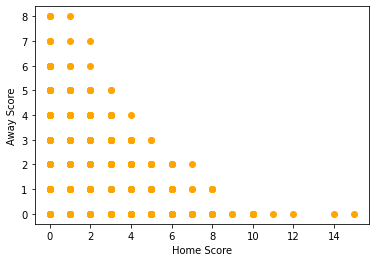

In [61]:
#a scatter plot for home scores and away scores
plt.scatter(data['home_score'],data['away_score'],color='orange')
plt.xlabel('Home Score')
plt.ylabel("Away Score")
plt.show()

This scatter plot shows some type of relationship between the home scores and the away scores.

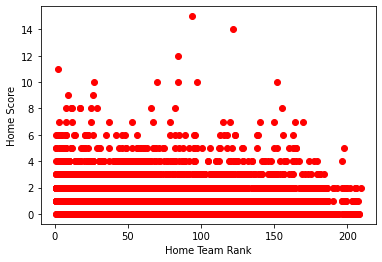

In [40]:
#a scatter plot for the home team rank and the home score.
plt.scatter(data['home_team_rank'], data['home_score'], color='red')
plt.xlabel('Home Team Rank')
plt.ylabel("Home Score")
plt.show()

This plot shows that there might also be a relationship between the home team rank and their score.

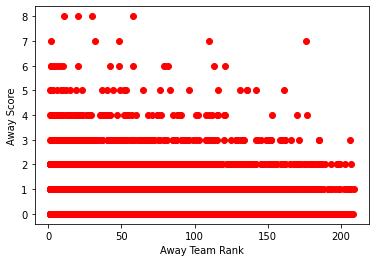

In [41]:
#scatter plot for away team rank and away scores.
plt.scatter(data['away_team_rank'], data['away_score'], color='red')
plt.xlabel('Away Team Rank')
plt.ylabel("Away Score")
plt.show()

This plot almost looks identical to the previous plot and there might be a similar relationship between the fields.

In [42]:
#sum of home scores.
data['home_score'].sum()

4783

In [43]:
#sum of away scores.
data['away_score'].sum()

3131

Home scores are more than away scores.

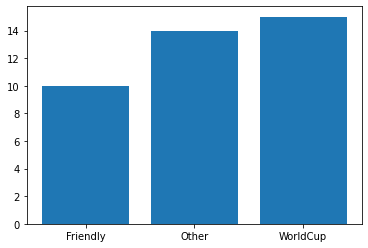

<Figure size 720x360 with 0 Axes>

In [70]:
#plotting bar graph for the tournament types.
plt.bar(data['tournament_1'], data['total_scores'])
plt.figure(figsize = (10,5))
plt.show()

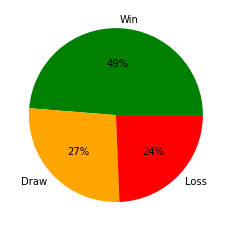

In [45]:
#a pie plot for wins, draws and losses.
colours = ['green','orange','red']
plt.pie(data['result'].value_counts(), colors=colours, labels=['Win', 'Draw', 'Loss'], autopct='%1.0f%%')
plt.show()

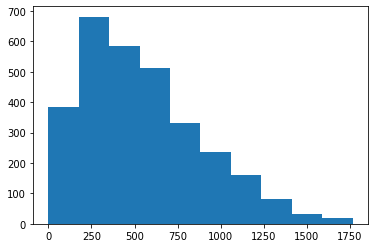

In [46]:
#plotting a histogram for the total points for the countries.
plt.hist(data['total_points'])
plt.show()

In [71]:
#creating a new dataset for use in our models.
match_data = data[['home_team','home_score','away_team','away_score','home_team_rank','away_team_rank','tournament','result']]
match_data.head()

,home_team,home_score,away_team,away_score,home_team_rank,away_team_rank,tournament,result
0,Guyana,2,India,1,114,158,Friendly,Win
1,Thailand,0,Singapore,0,120,129,Friendly,Draw
2,United Arab Emirates,3,Qatar,1,108,88,Friendly,Win
3,Bahrain,1,Sudan,0,101,98,Friendly,Win
4,Jordan,1,Indonesia,0,92,131,Friendly,Win


## **Approach 1 : Polynomial Regression**

In [72]:
#importing the necessary libraries.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from scipy.stats import bartlett
from math import sqrt

### **1st Polynomial Regression**

**The Data**

In [73]:
#previewing the data.
match_data.head()

,home_team,home_score,away_team,away_score,home_team_rank,away_team_rank,tournament,result
0,Guyana,2,India,1,114,158,Friendly,Win
1,Thailand,0,Singapore,0,120,129,Friendly,Draw
2,United Arab Emirates,3,Qatar,1,108,88,Friendly,Win
3,Bahrain,1,Sudan,0,101,98,Friendly,Win
4,Jordan,1,Indonesia,0,92,131,Friendly,Win


**Encoding**

In [100]:
#using an encoder to tranform our tournament column to numerical value.
le = preprocessing.LabelEncoder()
le.fit(match_data["tournament"])
match_data["tournament"] = le.transform(match_data["tournament"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
#previewing the data.
match_data.head()

,home_team,home_score,away_team,away_score,home_team_rank,away_team_rank,tournament,result
0,Guyana,2,India,1,114,158,22,Win
1,Thailand,0,Singapore,0,120,129,22,Draw
2,United Arab Emirates,3,Qatar,1,108,88,22,Win
3,Bahrain,1,Sudan,0,101,98,22,Win
4,Jordan,1,Indonesia,0,92,131,22,Win


In [76]:
#finding the correlation between the columns. 
match_data.corr()

,home_score,away_score,home_team_rank,away_team_rank,tournament
home_score,1.000000,-0.176862,-0.167987,0.306215,-0.008996
away_score,-0.176862,1.000000,0.201893,-0.260094,0.066543
home_team_rank,-0.167987,0.201893,1.000000,0.459219,-0.251846
away_team_rank,0.306215,-0.260094,0.459219,1.000000,-0.221240
tournament,-0.008996,0.066543,-0.251846,-0.221240,1.000000


**Polynomial Regression**

In [77]:
#assigning the independent variables and dependent variables to 'X' and 'y' respectively.
X = match_data.drop(["home_score","home_team","away_team","result"],axis=1)
y = match_data["home_score"]

In [101]:
#splitting the dataset
#fitting the linear regression.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1)
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)
poly_X_train, poly_X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.2, random_state = 0)
regression = LinearRegression()
#determining the working of the model and the score
model = regression.fit(poly_X_train, y_train)
score = model.score(poly_X_test, y_test)
print(model)
print(score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.24017422402601765


In [ ]:
#predicting using the regression and comparing the results with the actual values.
y_pred = regression.predict(poly_X_test)
differ = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
differ.describe()

In [ ]:
#finding the MSE and RMSE
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = sqrt(MSE)
print("The Mean Squared Error for Model 1 is: ", MSE)
print("The Root Mean Squared Error for Model 1 is: ", RMSE )

In [ ]:
#finding the residuals.
residuals = np.subtract(y_pred, y_test)
residuals.describe()

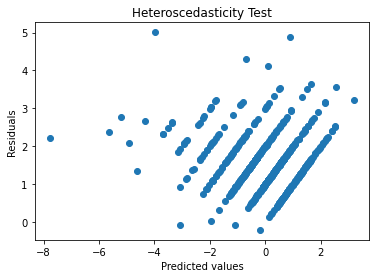

In [114]:
#plotting the heteroscedasticity
plt.scatter(residuals,y_pred)
plt.title("Heteroscedasticity Test")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

### **2nd Polynomial Regression**

In [84]:
#assigning the independent variables and dependent variables to 'X' and 'y' respectively.
X2 = match_data.drop(["away_score","home_team","away_team","result"],axis=1)
y2 = match_data["away_score"]

In [106]:
#splitting the dataset
#fitting the linear regression.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .2, random_state=0)
poly = PolynomialFeatures(degree=2)
poly_X2 = poly.fit_transform(X2)
poly_X2_train, poly_X2_test, y2_train, y2_test = train_test_split(poly_X2, y2, test_size = 0.2, random_state = 0)
regression = LinearRegression()
#determining the working of the model and the score
model = regression.fit(poly_X2_train, y2_train)
score = model.score(poly_X2_test, y2_test)
print(model)
print(score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.2373898460098115


In [86]:
#predicting using the regression and comparing the results with the actual values.
y2_pred = regression.predict(poly_X2_test)
differ = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
differ.describe()

,Actual,Predicted
count,604.000000,604.000000
mean,0.996689,1.042406
std,1.249871,0.563353
min,0.000000,-0.015675
25%,0.000000,0.658098
50%,1.000000,0.957566
75%,2.000000,1.303644
max,8.000000,4.286101


In [87]:
#finding the MSE and RMSE
MSE = metrics.mean_squared_error(y2_test, y2_pred)
RMSE = sqrt(MSE)
print("The Mean Squared Error for Model 2 is: ", MSE)
print("The Root Mean Squared Error for Model 2 is: ", RMSE )

The Mean Squared Error for Model 2 is:  1.1893604547357395
The Root Mean Squared Error for Model 2 is:  1.0905780369766023


In [88]:
#finding the residuals.
residuals2 = np.subtract(y2_pred, y2_test)
residuals2.describe()

count    604.000000
mean       0.045717
std        1.090522
min       -6.256470
25%       -0.466870
50%        0.274983
75%        0.786910
max        2.580497
Name: away_score, dtype: float64

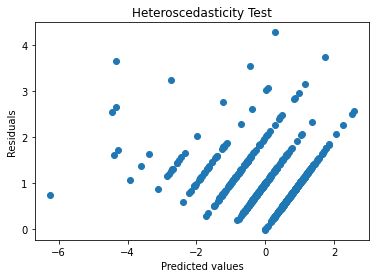

In [105]:
#plotting the heteroscedasticity
plt.scatter(residuals2,y2_pred)
plt.title("Heteroscedasticity Test")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

## **Approach 2 : Logistic Approach**

**The data**

In [90]:
match_data.head()

,home_team,home_score,away_team,away_score,home_team_rank,away_team_rank,tournament,result
0,Guyana,2,India,1,114,158,22,Win
1,Thailand,0,Singapore,0,120,129,22,Draw
2,United Arab Emirates,3,Qatar,1,108,88,22,Win
3,Bahrain,1,Sudan,0,101,98,22,Win
4,Jordan,1,Indonesia,0,92,131,22,Win


**Encoding**

In [107]:
#using an encoder to tranform our result column to numerical value.
le = preprocessing.LabelEncoder()
le.fit(match_data["result"])
match_data["result"] = le.transform(match_data["result"])
match_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,home_team,home_score,away_team,away_score,home_team_rank,away_team_rank,tournament,result
0,Guyana,2,India,1,114,158,22,2
1,Thailand,0,Singapore,0,120,129,22,0
2,United Arab Emirates,3,Qatar,1,108,88,22,2
3,Bahrain,1,Sudan,0,101,98,22,2
4,Jordan,1,Indonesia,0,92,131,22,2


### **Logistic Regression**

In [108]:
#assigning the independent variables and dependent variables to 'X' and 'y' respectively.
X3 = match_data.drop(["home_team","away_team"],axis=1)
y3 = match_data["result"]

In [109]:
#fitting out logistic regression model
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state=1)
logistic = LogisticRegression()
logistic.fit(X3_train, y3_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
#predicting using the regression
y3_pred = logistic.predict(X3_test)

In [111]:
#comparing the results with the actual values.
differ3 = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_pred})
differ3.describe()

,Actual,Predicted
count,604.000000,604.000000
mean,1.293046,1.293046
std,0.817644,0.817644
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,2.000000,2.000000


### **Verification**

In [112]:
#creating a confusion matrix for accuracy determination
confusion_matrix = confusion_matrix(y3_test, y3_pred)

TypeError: ignored

In [113]:
#viewing the confusion matrix.
confusion_matrix

array([[139,   0,   0],
       [  0, 149,   0],
       [  0,   0, 316]])

## **Conclusion**

* The confusion matrix shows that we have attained 100% accuracy and this shows that this model is perfect for prediction.
* Data from the rankings from the date (8-24-2020) should be used for prediction

From the conclusions, I can derive that I have achieved my goal, which was to find a suitable model for prediction.
The correct model is **Logistic regression** since it has an accuracy level of 100%